# 確率変数と確率分布

### 確率分布とRの関数

Rにはデフォルトで様々な確率分布が関数として備わっている.
正規分布なら`norm`, 二項分布なら`binom`を利用する.
先頭に`d`がつけば確率密度, `p`がつけば累積分布, `q`がつけば確率点を求め,
先頭に`r`がつけば指定の分布に従った乱数を生成する.
引数として各分布に必要なパラメーターを指定する.

例えば, 下記のコードは正規分布の累積分布を表す. 詳細は後述する.

In [ ]:
pnorm(q = 0, mean = 0, sd = 1)

[1] 0.5

## 二項分布

### 二項分布の確率質量

二項分布の確率質量を求めるには`dbinom()`関数を用いる.
コイン投げを例に説明すると,
表と裏の出る確率が等しい(`prob = 0.5`)コイン`size`回投げたときに,
表が`x`回出る確率を求める.

In [ ]:
dbinom(x = 1, size = 4, prob = 0.5)

[1] 0.25

二項分布の定義に従って確率質量を求める.
`choose()`関数を用いて組み合わせを求める.

In [ ]:
choose(n = 4, k = 1) * 0.5^1 * (1 - 0.5)^(4 - 1)

[1] 0.25

表が出る確率を0から1までそれぞれ求める.

In [ ]:
dbinom(x = 0:4, size = 4, prob = 0.5)

[1] 0.0625 0.2500 0.3750 0.2500 0.0625

確率質量の総和は1となる.

In [ ]:
sum(dbinom(x = 0:4, size = 4, prob = 0.5))

[1] 1

### 二項分布の累積分布

二項分布の累積分布を求めるには`pbinom()`関数を用いる.
表と裏の出る確率が等しい(`prob = 0.5`)コインを`size = 4`回投げたときに,
表が`q = 1`回以下出る確率を求める.

In [ ]:
pbinom(q = 1, size = 4, prob = 0.5)

[1] 0.3125

累積分布は実際に確率質量関数の総和であることがわかる.

In [ ]:
sum(dbinom(x = 0:1, size = 4, prob = 0.5))

[1] 0.3125

### 二項分布の累積分布を用いた例

0.5%の確率でウルトラレアのキャラクターが出るガチャを100回引いて,
2体以上ウルトラレアを得る確率は次のように求める.

In [ ]:
1 - pbinom(q = 1, size = 100, prob = 0.005)

[1] 0.08982231

引数で`lower.tail = FALSE`と指定すれば上側確率($P[X > x]$)が求められる.

In [ ]:
pbinom(q = 1, size = 100, prob = 0.005, lower.tail = FALSE)

[1] 0.08982231

### 二項分布とグラフ1

0.5%の確率でウルトラレアのキャラクターが出るガチャを100回引いて,
ウルトラレアのキャラクターを引く回数をグラフにする.
確率分布関数から理論値を描画するには,
`ggplot2::stat_function()`関数を利用する. `fun =`で確率分布を指定し,
`args =`で確率分布を求める関数の引数を`list()`関数を用いて指定する.

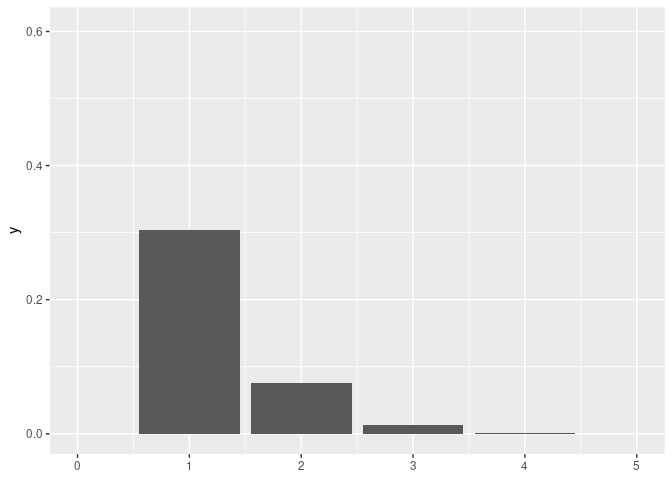

In [ ]:
library(pacman)
pacman::p_load(ggplot2)
ggplot() +
  xlim(0, 5) +
  stat_function(
    fun   = dbinom,
    n     = 6,
    args  = list(size = 100,
                 prob = 0.005),
    na.rm = TRUE,
    geom  = "bar"
    )

コインを10回投げ, 10回表が向いた時にコインが表を向く確率を描画する.

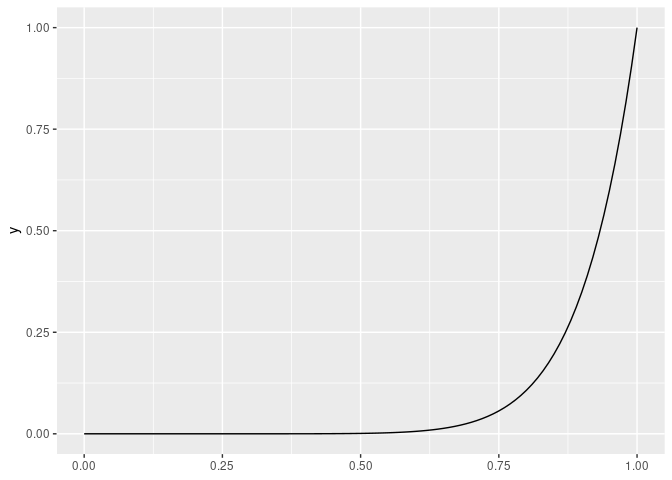

In [ ]:
ggplot() +
  xlim(0, 1) +
  stat_function(
    fun  = dbinom,
    args = list(
      x    = 10,
      size = 10
    )
  )

## 正規分布

### 正規分布の確率密度

正規分布の確率密度を求めるには, `dnorm()`関数を利用する.
`*norm()`関数ではデフォルトで, 標準正規分布が指定されている.

In [ ]:
dnorm(x = 0)

[1] 0.3989423

標準正規分布の確率密度関数の定義に従って計算を行う.

In [ ]:
1 / sqrt(2 * pi) * exp(- 0^2 / 2)

[1] 0.3989423

### 正規分布の確率密度関数とグラフ

正規分布を描画するには,
`stat_function()`関数の引数として`fun = dnorm`を指定する.

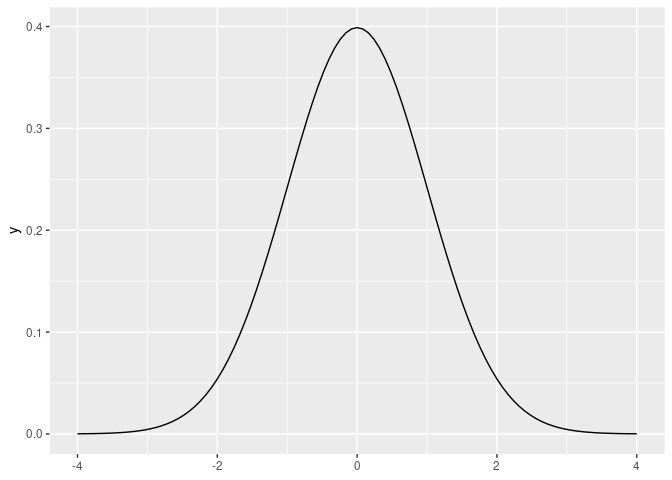

In [ ]:
ggplot() +
  xlim(-4, 4) +
  geom_function(
    fun = dnorm
  )

### 正規分布の確率密度関数と平均

標準正規分布を点線で, 平均1標準偏差1の正規分布を実線で描画し,
比較を行う. 形は変えずに1だけ右に移動したグラフとなっていることがわかる.

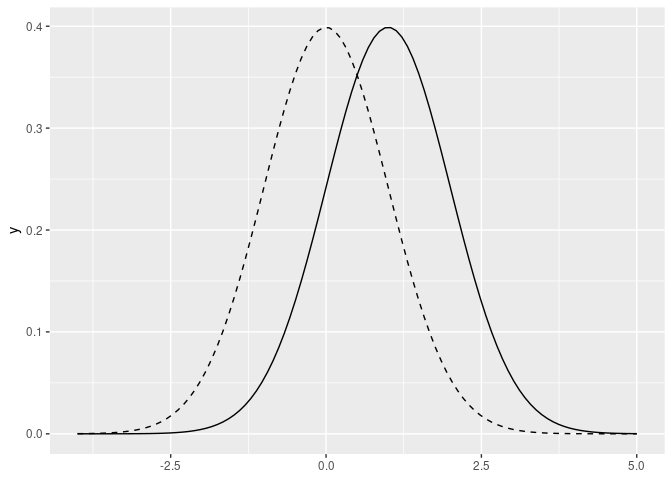

In [ ]:
ggplot() +
  xlim(-4, 5) +
  geom_function(
    fun      = dnorm,
    linetype = "dashed"
  ) +
  geom_function(
    fun  = dnorm,
    args = list(mean = 1)
  )

### 正規分布の確率密度関数と標準偏差

標準正規分布を点線で, 平均0標準偏差0.5の正規分布を実線で描画し,
比較を行う. 位置は変えずによりシャープなグラフとなっていることがわかる.

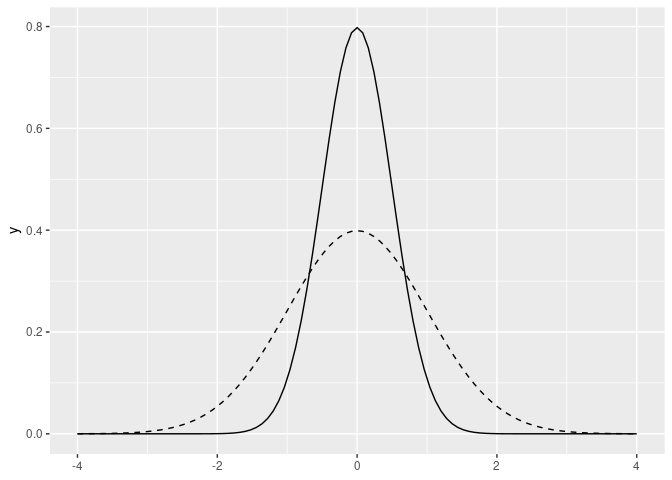

In [ ]:
ggplot() +
  xlim(-4, 4) +
  geom_function(
    fun      = dnorm,
    linetype = "dashed"
  ) +
  geom_function(
    fun  = dnorm,
    args = list(sd = 0.5)
  )

### $\pm 2 \sigma$ 区間の描画

正規分布は $\pm 1 \sigma$ 区間に約68 $\%$のデータが, $\pm 2 \sigma$
区間に約95 $\%$データが含まれる.

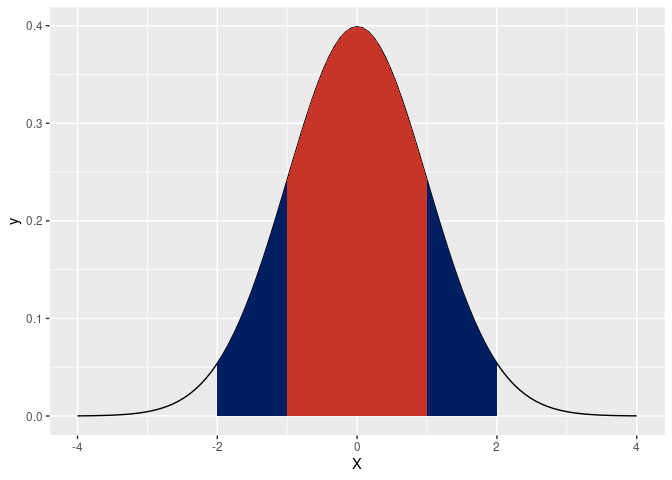

In [ ]:
p_load(tibble)
ggplot(data = NULL) +
  xlim(-4, 4) +
  geom_function(fun = dnorm) +
  geom_ribbon(
    data = tibble(
      X = seq(-2, 2, len = 1000),
      Y = dnorm(X)),
    aes(x = X, ymin = 0, ymax = Y),
    fill = "#001E62") +
  geom_ribbon(
    data = tibble(
      X = seq(-1, 1,len = 1000),
      Y = dnorm(X)),
    aes(x = X, ymin = 0, ymax = Y),
    fill = "#C63527")

様々なパラメーターの正規分布を描画する.

Installing package into '/cloud/lib/x86_64-pc-linux-gnu-library/4.4'
(as 'lib' is unspecified)

also installing the dependencies 'stringi', 'purrr', 'stringr'


tidyr installed

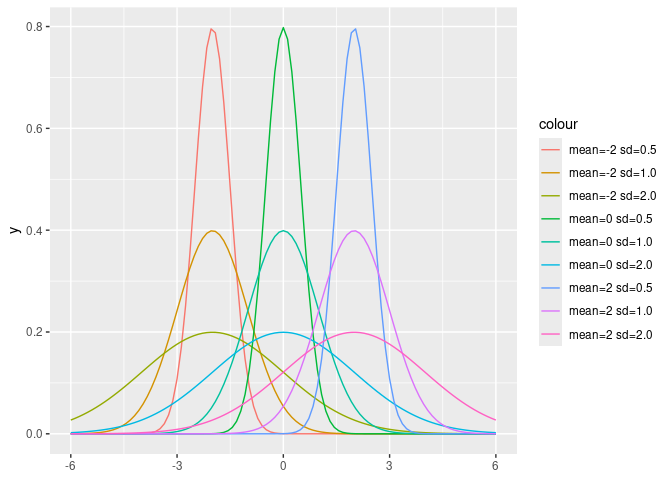

In [ ]:
p_load(tidyr)

### 正規分布の累積分布

正規分布の累積分布を求めるには, `pnorm()`関数を利用する.
$\Phi(-1.96)$を求める.

In [ ]:
pnorm(q = -1.96)

[1] 0.0249979

### 定義に従って標準正規分布の累積分布を求める(Advanced)

まず, 標準正規分布の確率密度関数を関数として定義する.
`function(x){}`で関数を定義する. `(x)`が定義した関数が取る引数である.
`{}`内に関数の定義を記述する.

In [ ]:
 f <- function(x){
   1 / sqrt(2 * pi) * exp(-x^2 / 2)
 } 

次に,
数値積分を行う`integrate()`関数を利用して積分を行い累積分布を求める.
第2引数で下端, 第3引数で上端を指定する.
定義した関数`f()`の`x`を指定している.

In [ ]:
integrate(f, -1.96, 1.96)

0.9500042 with absolute error < 1e-11

### 数値積分(Advanced)

1変数関数の積分の近似解を求める.
リーマン積分の考え方に準じて数値積分を行う関数を作成する.

In [ ]:
approx_integration <- 
  function(fun, from, to, length = 1000) {
    x_range <- seq(from       = from,
                   to         = to,
                   length.out = length)
    delta   <- x_range[2] - x_range[1]

    result <- 0
    for(i in 1:(length - 1)) {
      result <- result + fun(x_range[i]) * delta
    }
    return(result)
  }

### 数値積分の実行(Advanced)

積分する区間を等間隔に分け、関数を実行する.

In [ ]:
approx_integration(fun    = f, 
                   from   = -1.96,
                   to     = 1.96,
                   length = 1000)

[1] 0.9500039

### 正規分布の累積分布関数とグラフ

累積分布関数を描画するには`stat_function()`関数の引数で`fun = pnorm`を指定する.

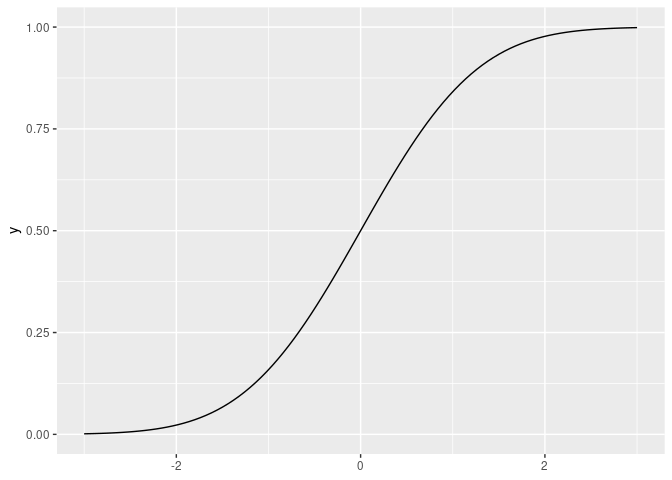

In [ ]:
ggplot() +
  xlim(-3, 3) +
  geom_function(
    fun = pnorm
  )

### 正規分布の確率点

正規分布の確率点(累積分布関数の逆関数)を求めるには`qnorm()`関数を用いる.
正規分布の平均を与えるには引数で`mean =`を指定し,
標準偏差を与えるには`sd =`を指定する.

In [ ]:
qnorm(p = 0.025, mean = 0, sd = 1)

[1] -1.959964

### 確率密度関数と確率点

正規分布の確率密度関数のグラフに確率点を求めて線を引く.
まず`dnorm()`関数で標準正規分布のグラフを描き,
その上に`geom_vline()`関数で縦線を引く.
引数の`xintercept`で確率点を求める`qnorm()`関数を利用する.

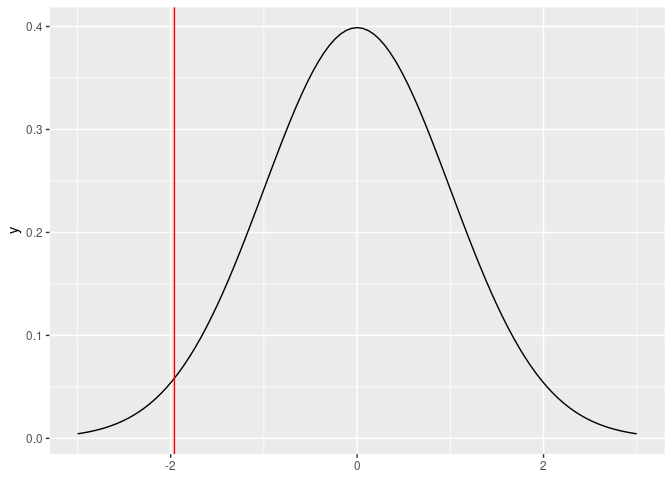

In [ ]:
ggplot() +
  xlim(-3, 3) +
  geom_function(
    fun = dnorm) +
  geom_vline(
    xintercept = qnorm(p = 0.025),
    colour     = "red")

## 一様分布

### 一様分布の確率密度関数とグラフ

一様分布を描画する. `dunif`関数で最小値と最大値を指定する.

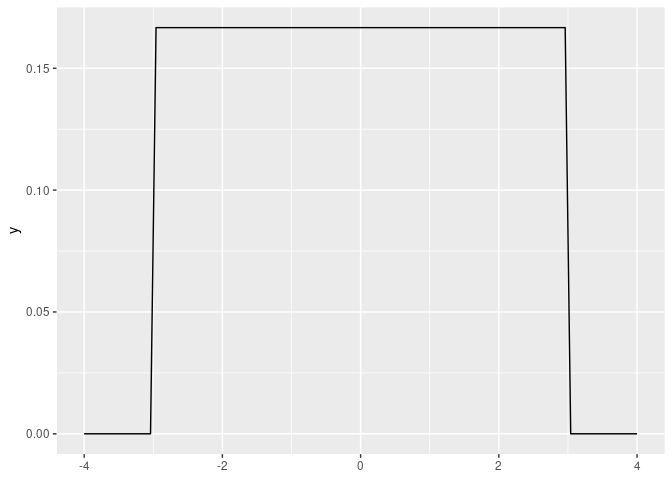

In [ ]:
ggplot() +
  xlim(-4, 4) +
  geom_function(
    fun  = dunif, 
    args = list(min = -3, 
                max = 3))

## ポアソン分布

### ポアソン分布の確率密度関数とグラフ

単位時間あたりの事象の平均回数が3のポアソン分布を描画する.

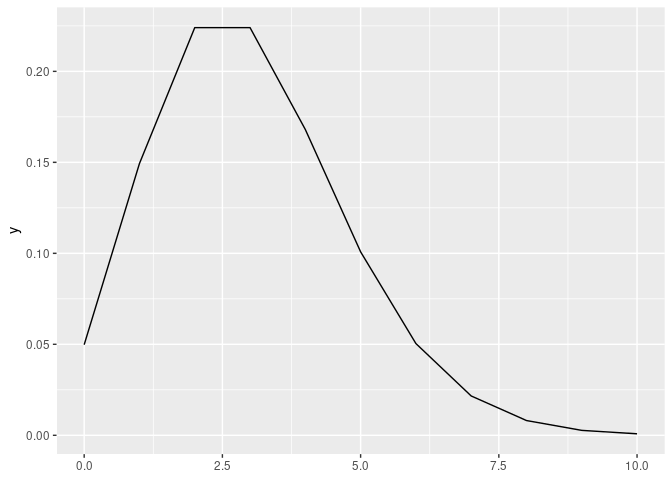

In [ ]:
ggplot() +
  xlim(0, 10) +
  stat_function(
    fun  = dpois,
    n    = 11,
    args = list(lambda = 3))

様々な$\lambda$(文献によっては$\mu$)のポアソン分布を描く.

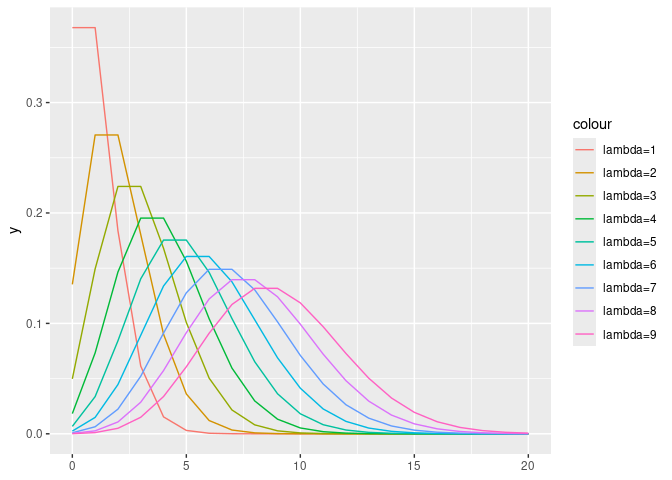

In [ ]:
par <- tibble(lambda = 1:9)
ggplot() +
  xlim(0, 20) +
  mapply(
    \(lambda, colour) {
      geom_function(
        fun  = dpois,
        n    = 21,
        args = list(lambda = lambda),
        aes(colour = colour)
      )
    },
    par$lambda,
    sprintf("lambda=%.0f", par$lambda)
  )

## 負の二項分布

### 負の二項分布の確率密度関数とグラフ

成功回数3, 成功確率0.5の負の二項分布を描画する.

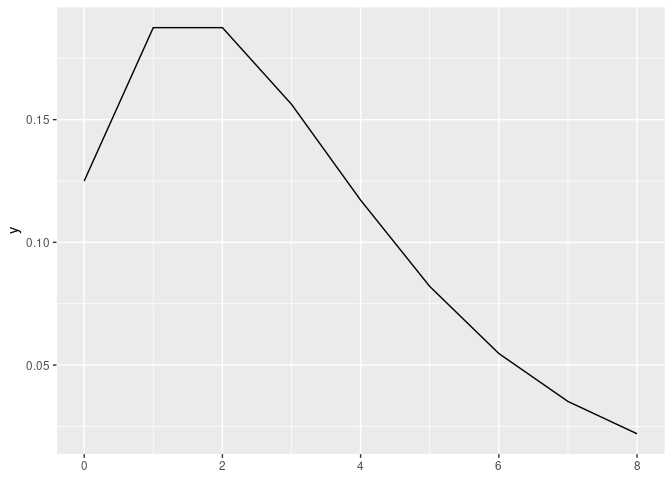

In [ ]:
ggplot() +
  xlim(0, 8) +
  geom_function(
    fun  = dnbinom,
    n    = 9,
    args = list(size = 3,
                prob = .5))

様々なパラメーターの負の二項分布を描画する.

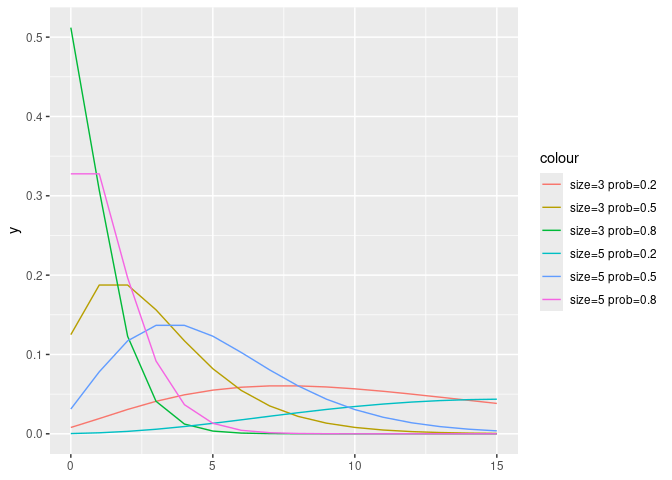

In [ ]:
par <- expand_grid(
  size = c(3, 5), 
  prob = c(.2, .5, .8))
ggplot() +
  xlim(0, 15) +
  mapply(
    \(size, prob, colour) {
      geom_function(
        fun  = dnbinom, 
        n    = 16,
        args = list(size = size,
                    prob = prob),
        aes(colour = colour))
      },
    par$size, par$prob,
    sprintf("size=%.0f prob=%.1f", 
            par$size,  par$prob)
  )

## 指数分布

### 指数分布の確率密度関数とグラフ

$\lambda$が1のときの指数分布を描画する.

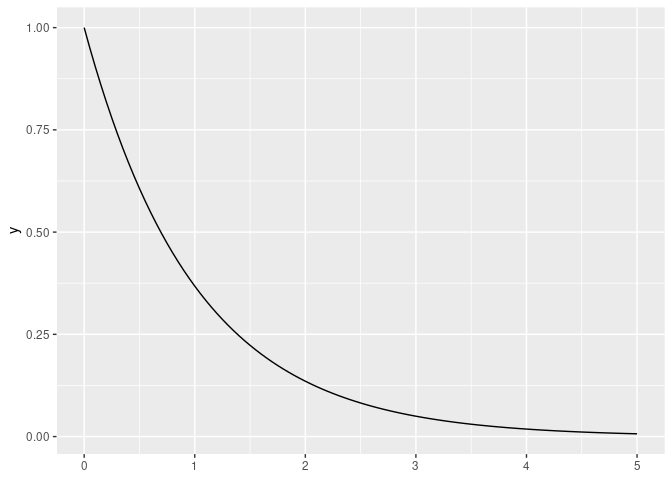

In [ ]:
ggplot() +
  xlim(0, 5) +
  geom_function(
    fun  = dexp,
    args = list(rate = 1))

様々なパラメーターの指数分布を描画する.

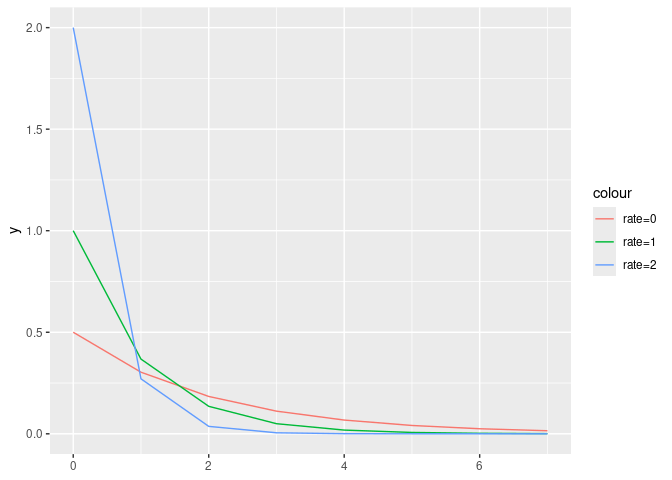

In [ ]:
par <- tibble(
  rate = c(0.5, 1, 2))
ggplot() +
  xlim(0,  7) +
  mapply(
    \(rate, colour) {
      geom_function(
        fun  = dexp,
        n    = 8,
        args = list(rate = rate),
        aes(colour = colour))
      },
    par$rate, 
    sprintf("rate=%.0f",
            par$rate)
  )

## ベータ分布

### ベータ分布の確率密度関数とグラフ

$\alpha = 3$で$\beta = 2$の時のベータ分布を描画する.

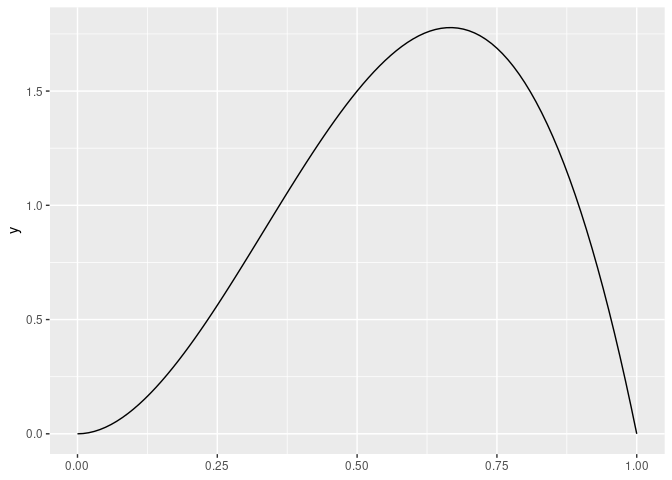

In [ ]:
ggplot() +
  xlim(0, 1) +
  geom_function(
    fun  = dbeta, 
    args = list(shape1 = 3, 
                shape2 = 2))

様々なパラメーターのベータ分布を描画する.

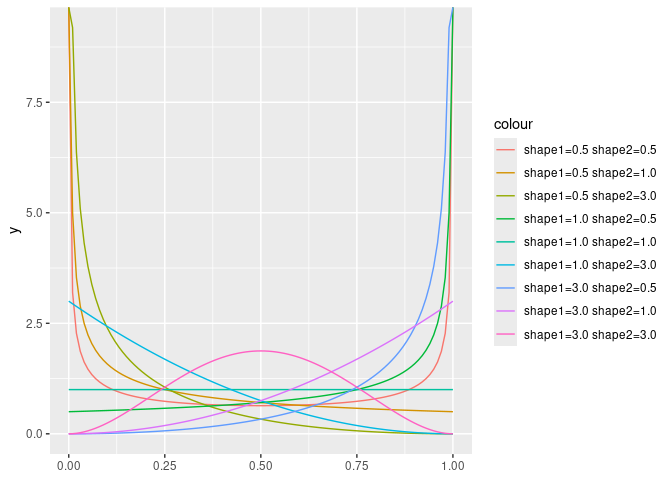

In [ ]:
par <- expand_grid(
  shape1 = c(.5, 1, 3),
  shape2 = c(.5, 1, 3))
ggplot() +
  xlim(0, 1) +
  mapply(
    \(shape1, shape2, colour) {
      geom_function(
        fun  = dbeta,
        args = list(shape1 = shape1, 
                    shape2 = shape2),
        aes(colour = colour))
      },
    par$shape1, par$shape2,
    sprintf("shape1=%.1f shape2=%.1f", 
            par$shape1,  par$shape2)
  )

## ガンマ分布

### ガンマ分布の確率密度関数とグラフ

ガンマ分布を描画する.

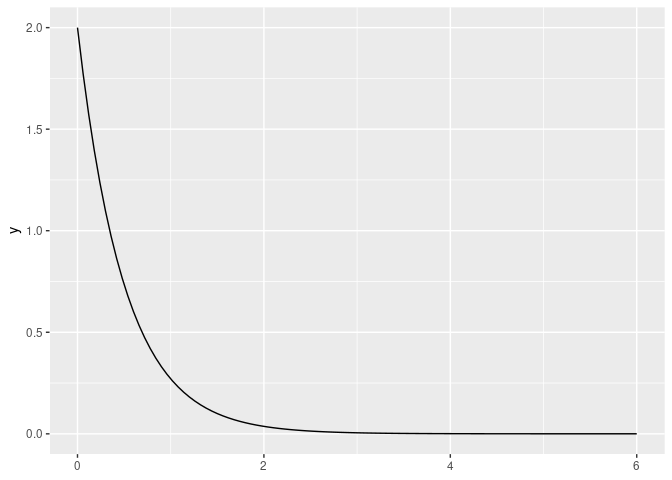

In [ ]:
ggplot() +
  xlim(0, 6) +
  geom_function(
    fun  = dgamma,
    args = list(shape = 1,
                rate  = 2))

様々なパラメーターのガンマ分布を描画する.

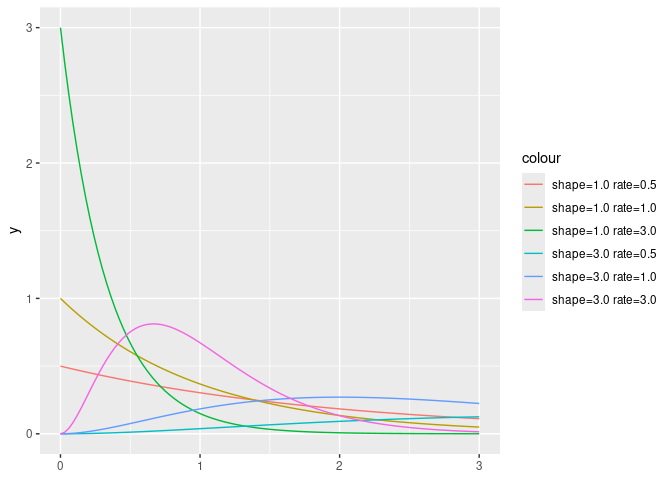

In [ ]:
par <- expand_grid(
  shape = c(1, 3), 
  rate  = c(.5, 1, 3))
ggplot() +
  xlim(0, 3) +
  mapply(
    \(shape, rate, colour){
      geom_function(
        fun  = dgamma,
        args = list(shape = shape,
                    rate  = rate),
        aes(colour = colour))
      },
    par$shape, par$rate, 
    sprintf("shape=%.1f rate=%.1f",
            par$shape,  par$rate)
  )

## $\chi ^2$分布

### $\chi^2$分布の確率密度関数とグラフ

$\chi^2$分布を描画する.

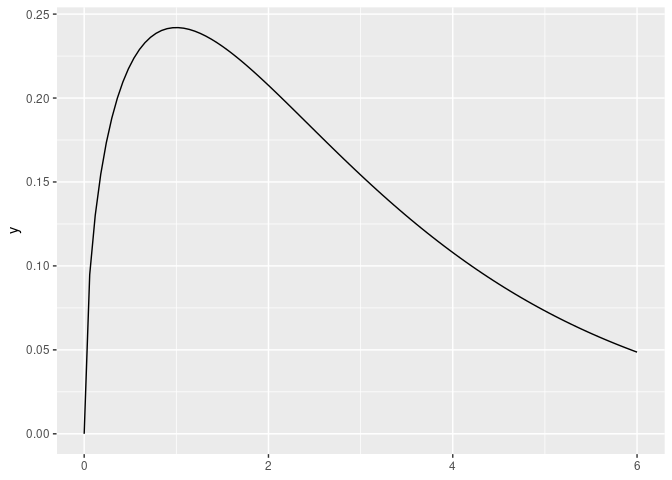

In [ ]:
ggplot() +
  xlim(0, 6) +
  geom_function(
    fun  = dchisq, 
    args = list(df = 3))

様々なパラメーターの$\chi^2$分布を描画する.

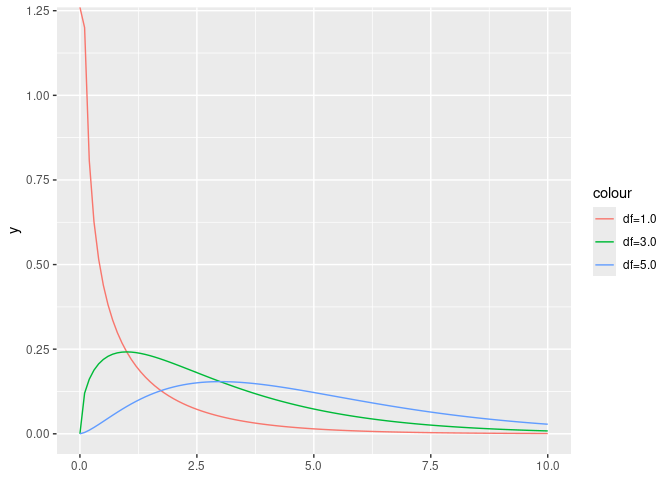

In [ ]:
par <- tibble(df = c(1, 3, 5))
ggplot(data = NULL) +
  xlim(0, 10) +
  mapply(
    \(df, colour){
      geom_function(
        fun  = dchisq,
        args = list(df = df),
        aes(colour = colour))
      },
    par$df,
    sprintf("df=%.1f", par$df)
  )